In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


# Data Preparing


## EDA

In [8]:
# Display basic information about the dataframe
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Display summary statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


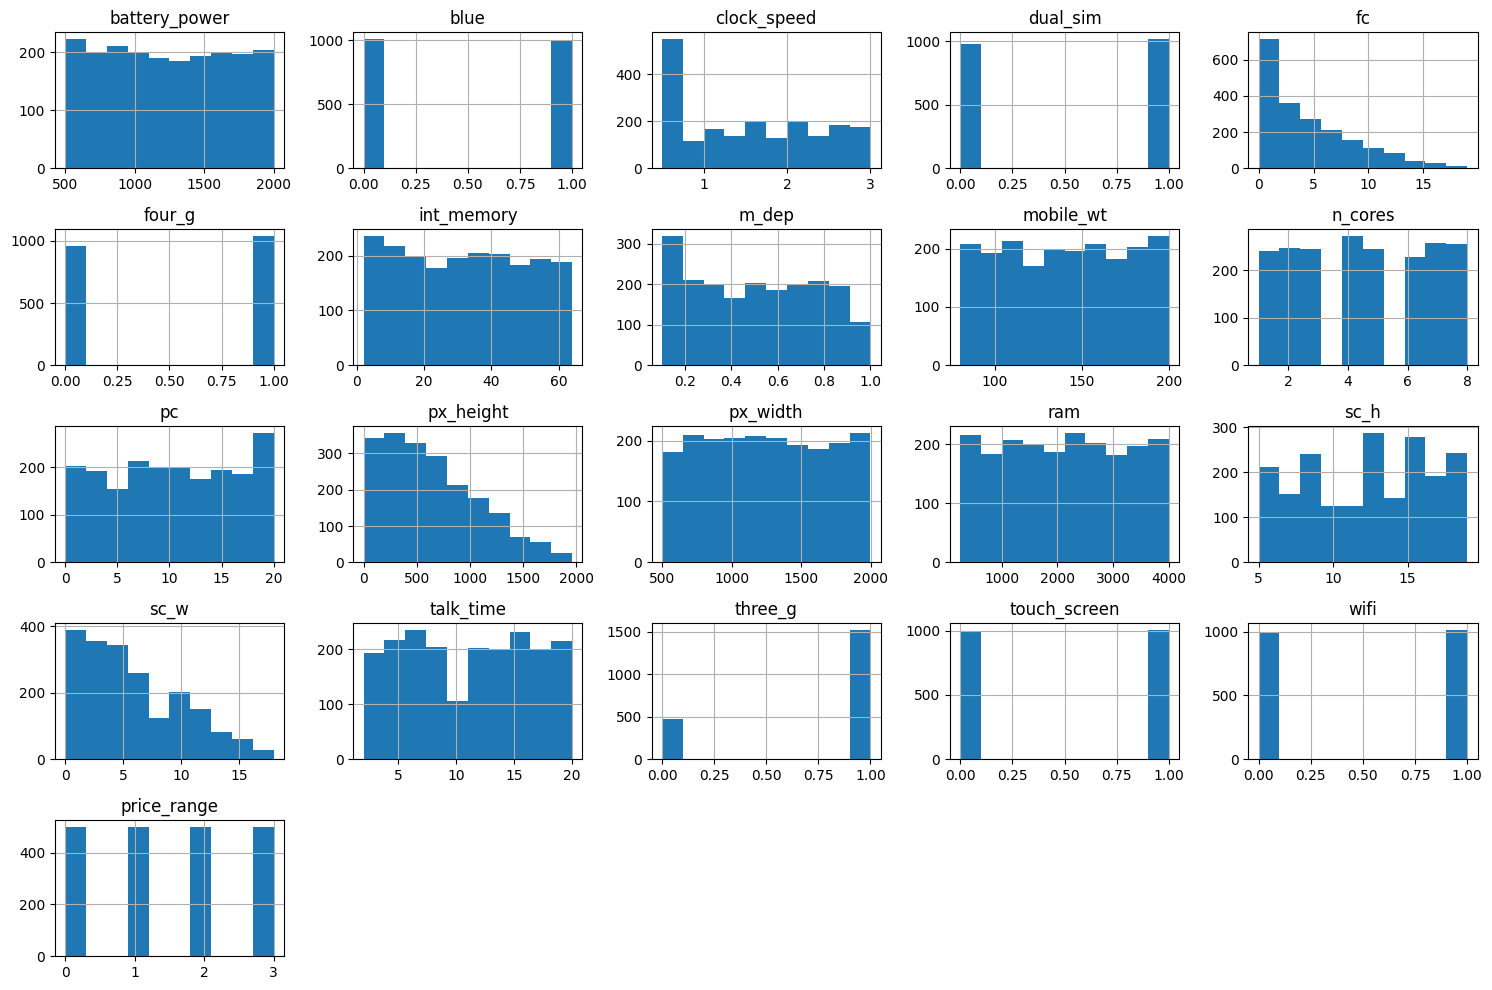

In [10]:
# Plot histograms for numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

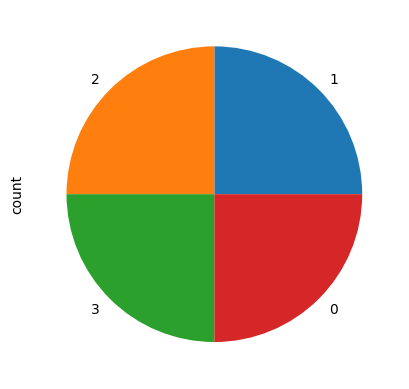

In [4]:
 df.price_range.value_counts().plot.pie()

<Axes: xlabel='price_range'>

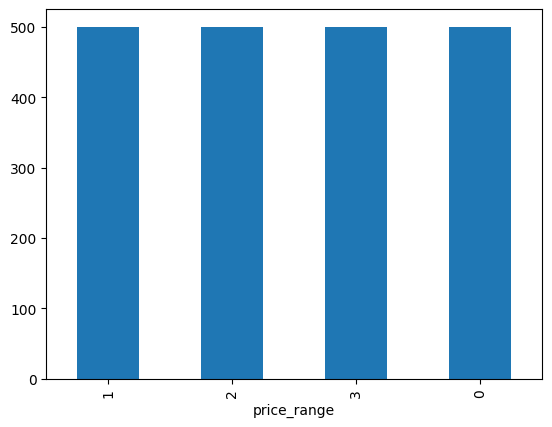

In [ ]:
df.price_range.value_counts().plot.bar()

we can see that the data is balanced

<Axes: >

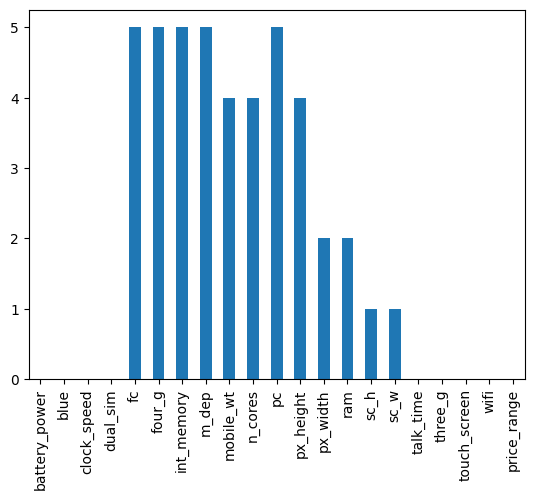

In [ ]:
df.isnull().sum().plot.bar()

    Dataset contain some nan value

In [ ]:
import numpy as np
df.applymap(np.isreal).all()


battery_power    True
blue             True
clock_speed      True
dual_sim         True
fc               True
four_g           True
int_memory       True
m_dep            True
mobile_wt        True
n_cores          True
pc               True
px_height        True
px_width         True
ram              True
sc_h             True
sc_w             True
talk_time        True
three_g          True
touch_screen     True
wifi             True
price_range      True
dtype: bool

all columns are numbers  

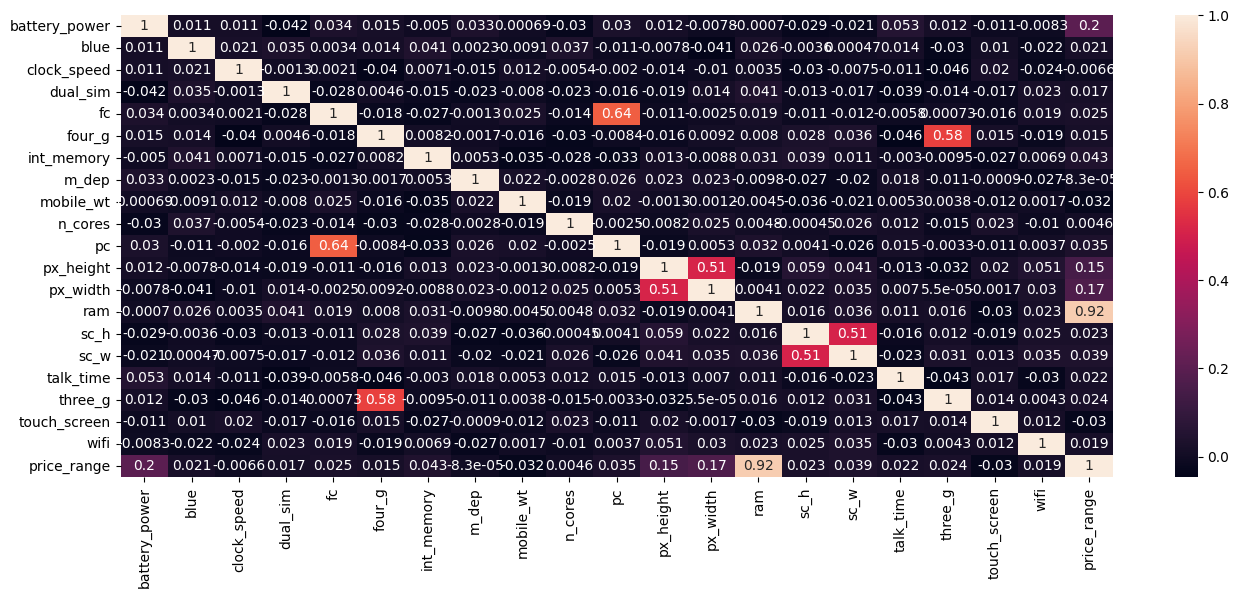

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


- px_height and px_width `(0.51)`: These two features are moderately positively correlated. This makes sense as the height and width of pixels in an image are often related.
- sc_h and sc_w `(0.51)`: Screen height and screen width are moderately positively correlated, which is expected since larger screens tend to be larger in both dimensions.
- fc and pc `(0.64)`: Front camera and primary camera megapixels have a moderate positive correlation. Higher-end phones tend to have better cameras on both the front and back.
- ram and price_range `(0.92)`: There is a strong positive correlation between RAM and price range, suggesting that phones with more RAM are generally more expensive.
- px_height and ram `(0.51)`: Pixel height and RAM have a moderate positive correlation, indicating that devices with higher pixel density screens tend to have more RAM.

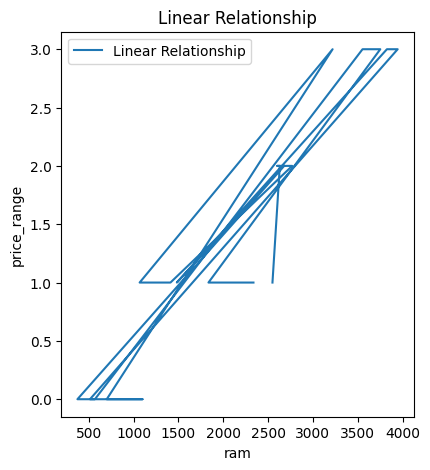

In [13]:
import numpy as np
import matplotlib.pyplot as plt
tempdf=df.dropna(how='any')
x =  tempdf.ram[:20]
y_linear =  tempdf.price_range[:20]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_linear, label='Linear Relationship')
plt.xlabel('ram')
plt.ylabel('price_range')
plt.title('Linear Relationship')
plt.legend()


**we can see that there are linear realtionship between price_range  and ram**

# Feauter Enginnering

Calculate the screen area and add a new column for the data

In [14]:
df["sc_area"]=df.sc_h  *df.sc_w


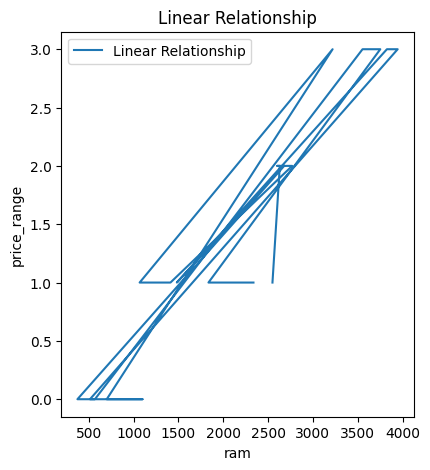

## Normalization  

In [15]:
def normalize(df):
  for column in df.columns:
    minimum=df[column].min()
    maximum=df[column].max()
    df[column]=(df[column]-minimum)/(maximum-minimum)
  return df


- `1`  Improves Model Performance: Helps algorithms converge faster and more stably, especially for gradient-based optimization.
- `2` Equal Feature Contribution: Ensures no feature dominates due to its scale, making models fairer.

In [16]:
def fil_with_median(df):
  for column in df.columns:
    medain=df[column].median()
    df[column].fillna(medain ,inplace=True)
  return df

Filling in the data with the median can help avoid losing important data, ensuring that each row has a value within the dataset.

In [17]:
def fil_with_mean(df):
  for column in df.columns:
    mean=df[column].mean()
    df[column].fillna(mean ,inplace=True)
  return df

Filling in the data with the mean can help avoid losing important data, ensuring that each row has a value within the dataset.

In [18]:
def drop(df):
  df.dropna(how='any', inplace=True)
  return df


In this case this method is only useful when we want to deal with data that is confirmed and not manipulated.

# Train models


## split data

In [19]:


X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)



## Model
 - - Logistic Regression

In [20]:

%%capture
tempdf=df.dropna(how='any' )
X = tempdf.drop('price_range', axis=1)
y = tempdf['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


In [21]:
print(accuracy_score(y_test, y_pred))

0.655


In [22]:
%%capture

tempdf=df.dropna(how='any' )
X=normalize(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [23]:


print(accuracy_score(y_test, y_pred))

0.93


  normalizing data make  Logistic Regression coverage

In [25]:
#save model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)



## Train function take train and test data and preprocessing function

In [26]:

def model_fit_predict_accuracy(model, preprocess_func, data):
  X = data.drop('price_range', axis=1)
  y = data['price_range']
  X= preprocess_func(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy


In [37]:
LogisticRegression_model = LogisticRegression()
svm_model = SVC()
NaiveBayes_model = GaussianNB()
DecisionTreeClassifier_model = DecisionTreeClassifier()
RandomForestClassifier_model = RandomForestClassifier( )
models=[LogisticRegression_model,svm_model,NaiveBayes_model,DecisionTreeClassifier_model,RandomForestClassifier_model]
models_name=["LogisticRegression","SVM",'NaiveBayes','DecisionTree','RandomForest']
functions=[drop,normalize,fil_with_mean,fil_with_median]

In [41]:
%%capture
result={"model":[],
        "function":[],
        "accuracy":[]}
for model in models:
    for preprocess_func in functions:
        function_name = preprocess_func.__name__
        accuracy = 0
        if function_name == 'normalize' or function_name == "drop":
            tempdf = df.dropna(how='any')
            accuracy = model_fit_predict_accuracy(model, preprocess_func, tempdf)
        else:
            accuracy = model_fit_predict_accuracy(model, preprocess_func, df)
        result['model'].append(type(model).__name__)
        result['function'].append(function_name)
        result['accuracy'].append(accuracy)

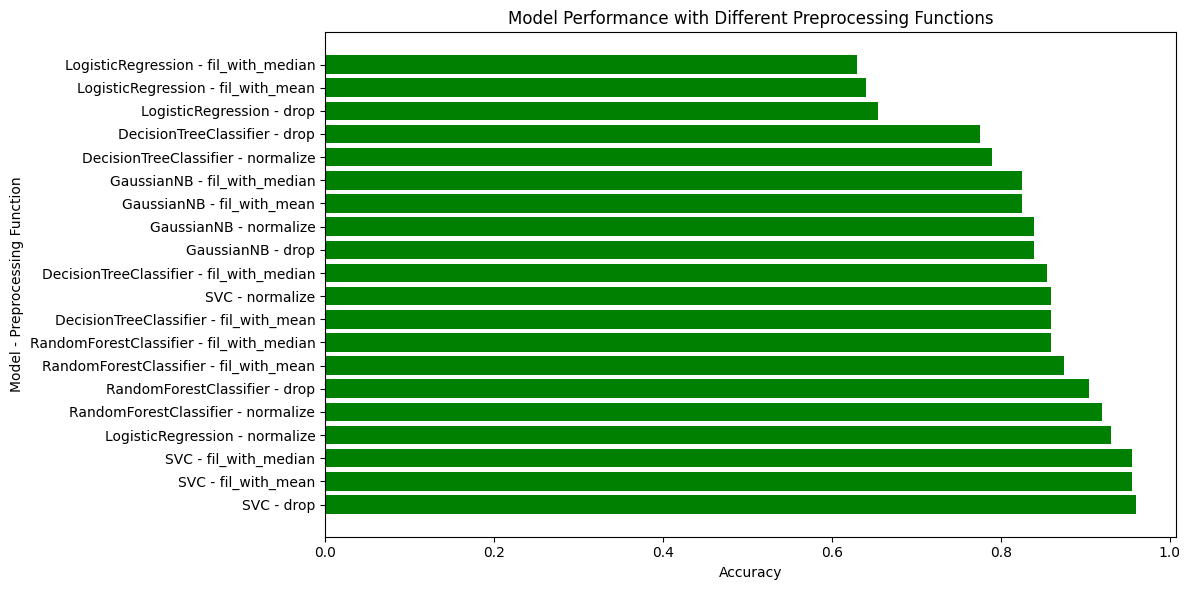

In [48]:
# Convert the result dictionary to a DataFrame
result_df = pd.DataFrame(result)

# Sort the DataFrame by accuracy in descending order
result_df.sort_values(by=['accuracy'], inplace=True, ascending=False)



# Create a horizontal bar plot of accuracy vs. model and preprocessing function
plt.figure(figsize=(12, 6))
plt.barh(range(len(result_df)), result_df['accuracy'],color="green")
plt.yticks(range(len(result_df)), result_df['model'] + ' - ' + result_df['function'])
plt.xlabel('Accuracy')
plt.ylabel('Model - Preprocessing Function')
plt.title('Model Performance with Different Preprocessing Functions')
plt.tight_layout()
plt.show()